### ANALYSES EXPLORATOIRE 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [2]:
penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Type de données

In [3]:
penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [4]:
(
    penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

In [5]:
penguin_df.shape

(344, 8)

nous avons 8 variables au totale avec 344 registres et 5 variables sont de types numerique et 3 variable categorique

### il y a des valeurs null dans le dataset?

In [6]:
(
    penguin_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [7]:
(
    penguin_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
# % valeur nan 
(penguin_df.isna().sum()/penguin_df.shape[0])*100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
year                 0.000000
dtype: float64

In [9]:
(
    penguin_df
    .isnull()
    .melt()
    
)

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


In [10]:
# suprimer les données nan
prepro_penguin_df = penguin_df.dropna()


l'exploration est basée sur l'examen des variables et la cohérence des données, ici il y avait des valeurs nan que nous avons supprimées pour faciliter l'exploration mais il y a des valeurs qui peuvent aussi être remplacées par la médiane, le mode.

### Analyses univariée

In [11]:
prepro_penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [12]:
# description de variable numerique
prepro_penguin_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [13]:
# description de variable categorique
prepro_penguin_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [14]:
(
  prepro_penguin_df
  .astype({
      'species': 'category',
      'island' : 'category',
      'sex' : 'category'
  })
  .describe(include= 'category')

 )

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Visualisation

<Axes: xlabel='species'>

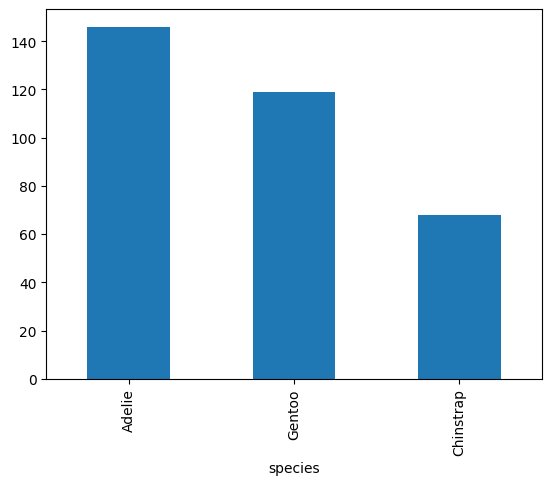

In [15]:
(

    prepro_penguin_df
    .species
    .value_counts()
    .plot(kind='bar')
 )

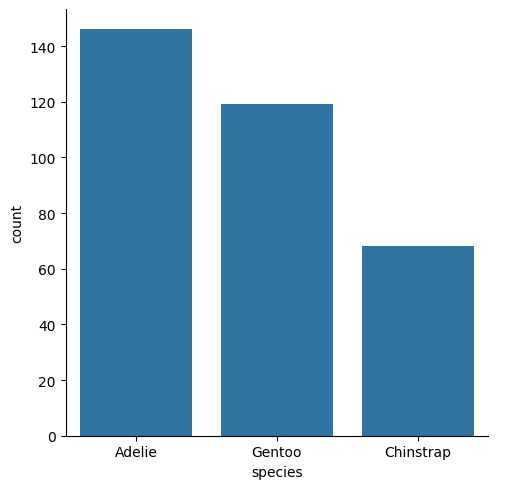

In [16]:
sns.catplot(
    data= prepro_penguin_df,
    x='species',
    kind='count'
)

<Axes: xlabel='species', ylabel='count'>

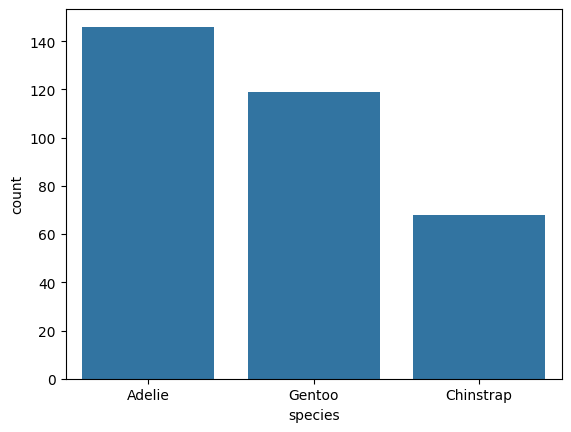

In [17]:
(
    prepro_penguin_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data= df,
                x='species',
                y='count'
            )
        )
    )
)

### Les mesures de tendance centrale

In [18]:
# mean
prepro_penguin_df.bill_depth_mm.mean()

17.164864864864867

In [19]:
# mean des variables numerique

prepro_penguin_df.mean(numeric_only= True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

#### Median

In [20]:
prepro_penguin_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

#### Mode

In [21]:
prepro_penguin_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


### Mesures de dispersion

#### valeur maximales?

In [22]:
prepro_penguin_df.max(numeric_only= True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

#### Valeurs minimales?

In [23]:
prepro_penguin_df.min(numeric_only= True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

#### range de variables?

In [24]:
prepro_penguin_df.max(numeric_only= True)-prepro_penguin_df.min(numeric_only= True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [25]:
prepro_penguin_df.std(numeric_only= True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

#### Quantile

In [26]:
numeric_columns = prepro_penguin_df.select_dtypes(include=np.number)
numeric_columns.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [27]:
(
    numeric_columns
    .quantile(q= [0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .assign(
        iqr=lambda df: df[0.75]-df[0.25]
        )
)

,0.75,0.5,0.25,iqr
variable,,,,
bill_length_mm,48.6,44.5,39.5,9.1
bill_depth_mm,18.7,17.3,15.6,3.1
flipper_length_mm,213.0,197.0,190.0,23.0
body_mass_g,4775.0,4050.0,3550.0,1225.0
year,2009.0,2008.0,2007.0,2.0


#### Visualisation

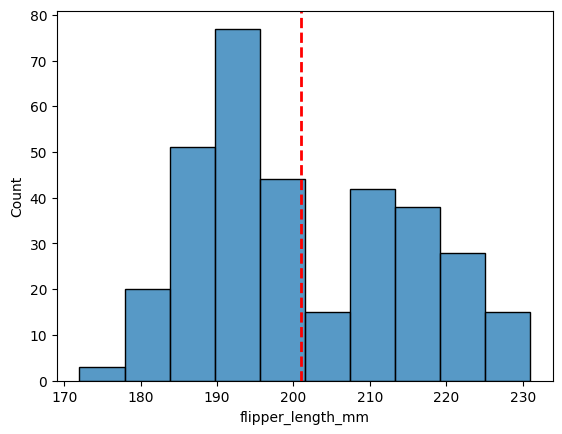

In [28]:
sns.histplot(
    data= prepro_penguin_df,
    x= 'flipper_length_mm'
)
plt.axvline(
    x=prepro_penguin_df.flipper_length_mm.mean(),
    color= 'red',
    linestyle='dashed',
    linewidth=2
)

<Axes: xlabel='flipper_length_mm'>

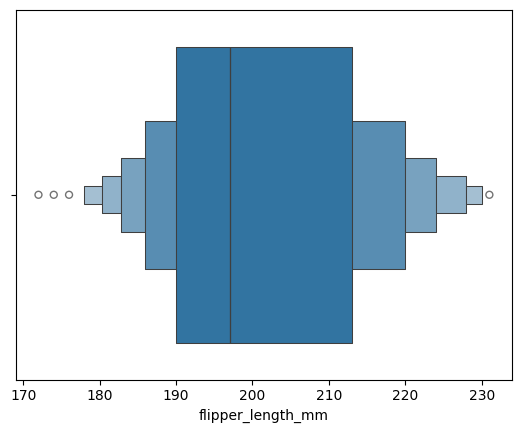

In [29]:
sns.boxenplot(
    data= prepro_penguin_df,
    x='flipper_length_mm'

)

In [30]:
def freeman_diaconis_bindwidth(x:pd.Series) -> float:
    IQR= x.quantile(0.75)-x.quantile(0.25)
    N= x.size
    return 2*IQR/N**(1/3)

In [31]:
freeman_diaconis_bindwidth(numeric_columns)

bill_length_mm         1.535559
bill_depth_mm          0.523103
flipper_length_mm      3.881084
body_mass_g          206.709929
year                   0.337486
dtype: float64

#### Probabilite

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

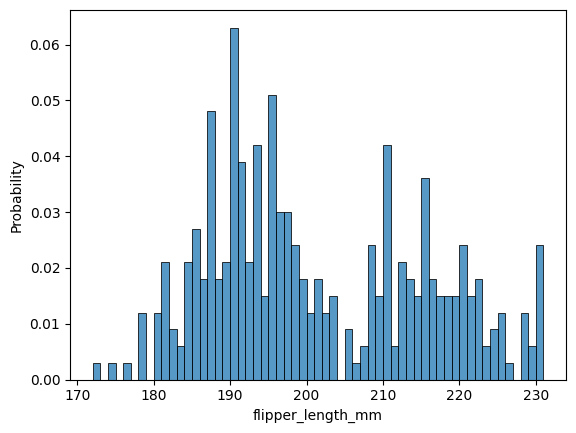

In [32]:
sns.histplot(
    data= prepro_penguin_df,
    x= 'flipper_length_mm',
    binwidth= 1,
    stat='probability'
)

In [33]:
#pip install empiricaldist


In [34]:
import empiricaldist as ed


In [35]:
pmf_flipper_length_mm = ed.Pmf.from_seq(
    prepro_penguin_df.flipper_length_mm,
    normalize=True
)


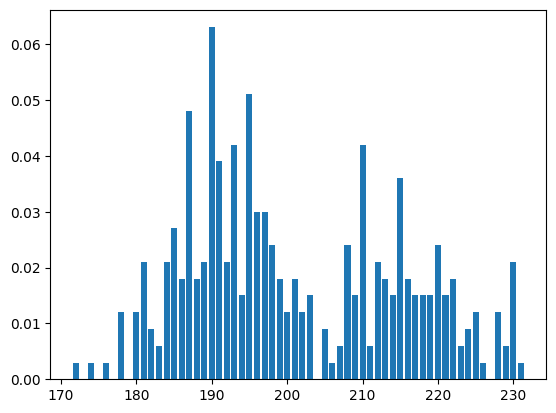

In [36]:
pmf_flipper_length_mm.bar()

In [37]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [38]:
prepro_penguin_df.flipper_length_mm.max()

231.0

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

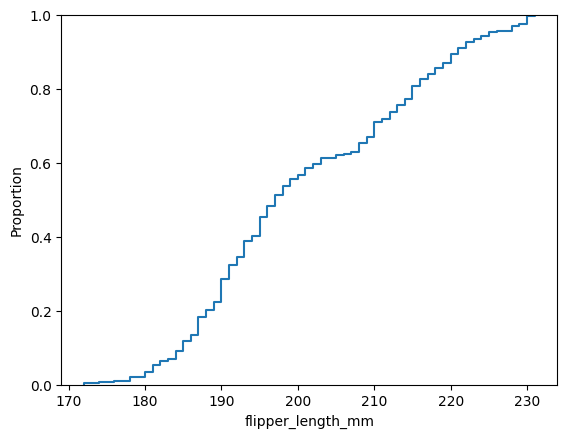

In [39]:
sns.ecdfplot(
    data=prepro_penguin_df,
    x='flipper_length_mm'
)

In [40]:
pmf_flipper_length_mm(200)

0.012012012012012012

In [41]:
cdf_flipper_length_mm= ed.Cdf.from_seq(
    prepro_penguin_df.flipper_length_mm,
    normalize=True
)

200 0.5675675675675675


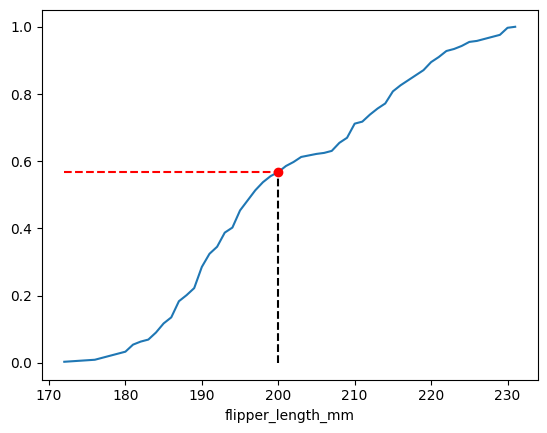

In [42]:
cdf_flipper_length_mm.plot()
q= 200
p=cdf_flipper_length_mm.forward(q)
print(q, p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='red',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

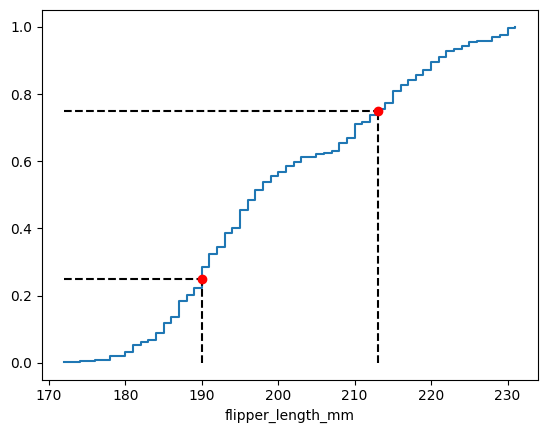

In [43]:
cdf_flipper_length_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

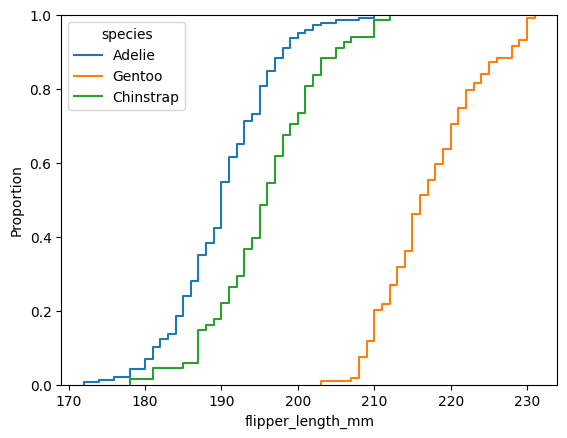

In [44]:
sns.ecdfplot(
    data=prepro_penguin_df,
    x='flipper_length_mm',
    hue='species'
)

In [45]:
stats=prepro_penguin_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

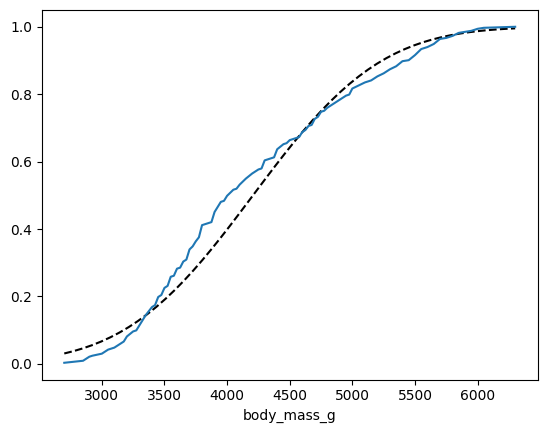

In [46]:

xs= np.linspace(stats['min'], stats['max'])
ys= scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle= 'dashed')
ed.Cdf.from_seq(
    prepro_penguin_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

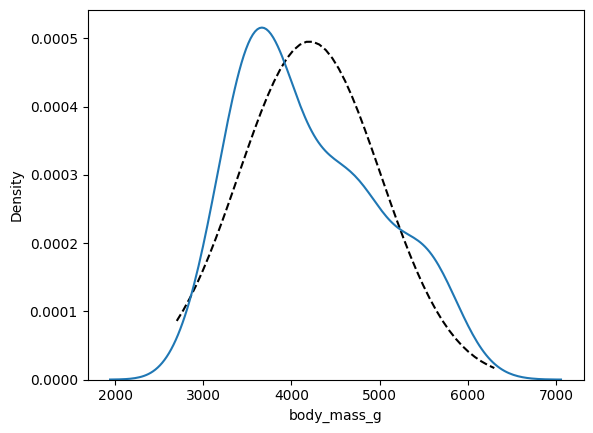

In [47]:
xs= np.linspace(stats['min'], stats['max'])
ys= scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle= 'dashed')
sns.kdeplot(
    data=prepro_penguin_df,
    x='body_mass_g'
)

### Analyse Bivariée

<Axes: xlabel='species', ylabel='flipper_length_mm'>

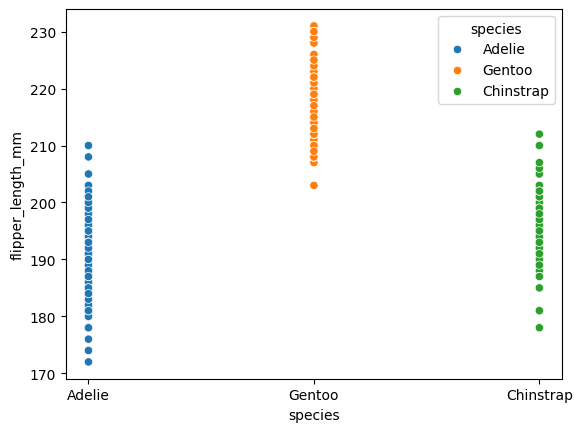

In [48]:
sns.scatterplot(
    data= prepro_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

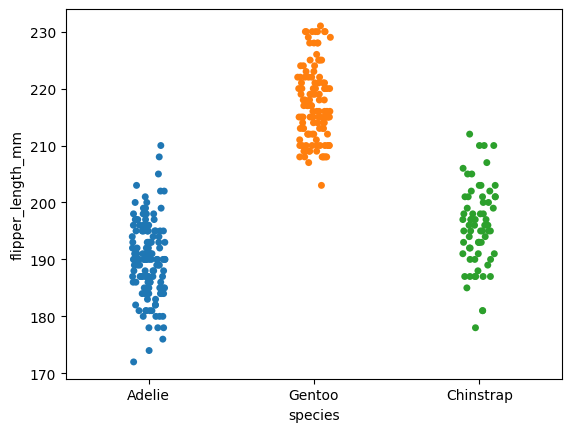

In [49]:
sns.stripplot(
    data= prepro_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

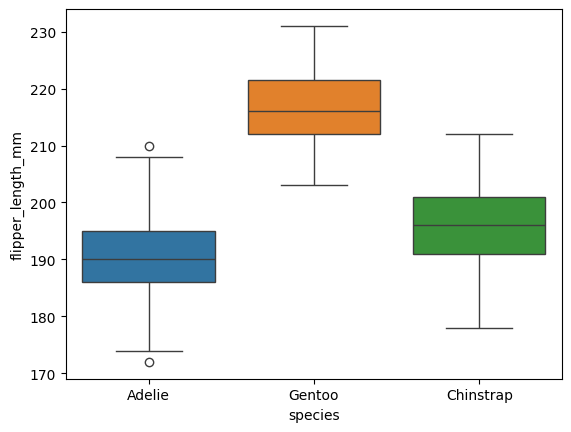

In [50]:
sns.boxplot(
    data= prepro_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

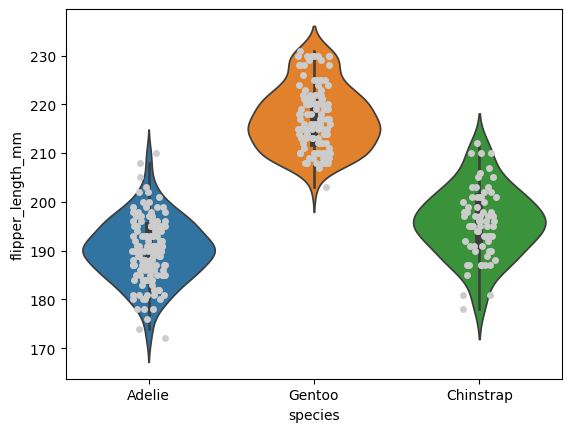

In [51]:
ax=sns.violinplot(
    data= prepro_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue= 'species'
)
ax= sns.stripplot(
    data= prepro_penguin_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

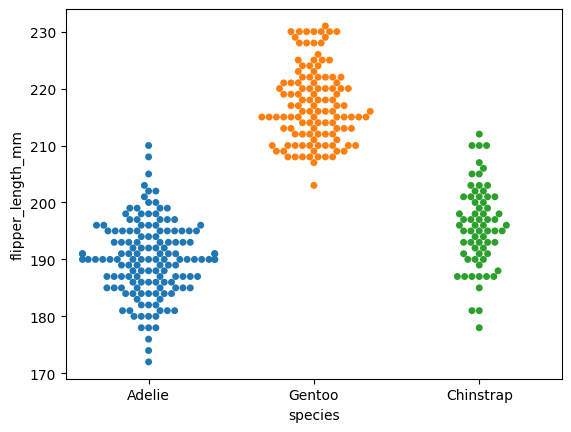

In [52]:
sns.swarmplot(
    data= prepro_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

### CORRELATION

In [53]:
numeric_columns.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


### Visualisation de correlation

<Axes: >

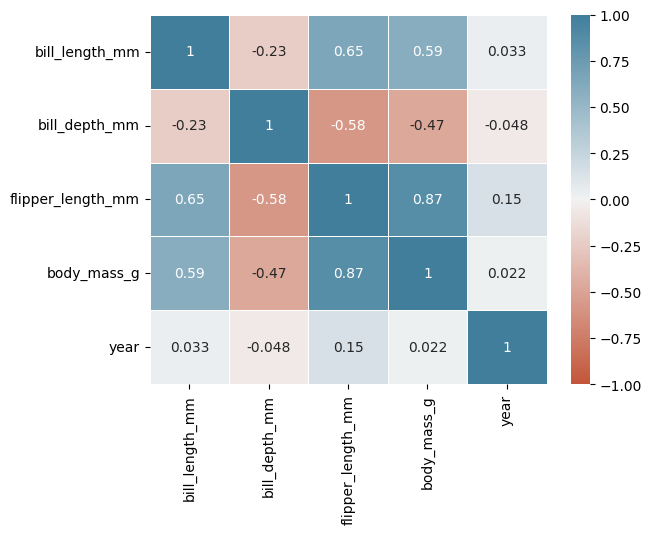

In [54]:
sns.heatmap(
    data=numeric_columns.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True),
    center= 0,
    vmin=-1,
    vmax=1,
    linewidths= 0.5,
    annot= True
    
    )

In [55]:
numeric_columns=(
    prepro_penguin_df
    .assign(
        numeric_sex= lambda prepro_penguin_df:prepro_penguin_df.sex.replace(['female', 'male'], [0,1])
    )
)

C:\Users\Jose Fabian Cardona\AppData\Local\Temp\ipykernel_5696\6940764.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_sex= lambda prepro_penguin_df:prepro_penguin_df.sex.replace(['female', 'male'], [0,1])


### Limitation coeficiente

array([[ 1.        , -0.02999699],
       [-0.02999699,  1.        ]])

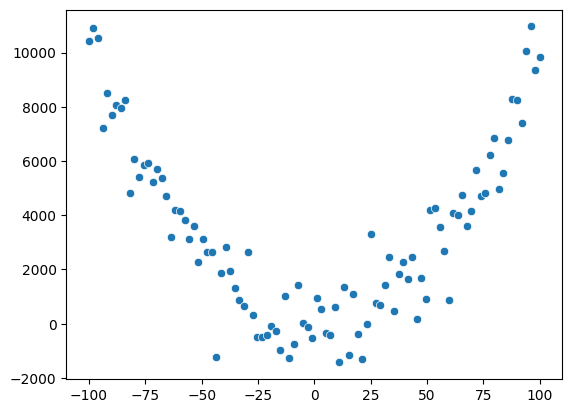

In [56]:
x=np.linspace(-100, 100, 100)
y=x**2
y+= np.random.normal(0,1000,x.size)
sns.scatterplot(
    x=x, y=y
)
np.corrcoef(x,y)

array([[1.        , 0.91664337],
       [0.91664337, 1.        ]])

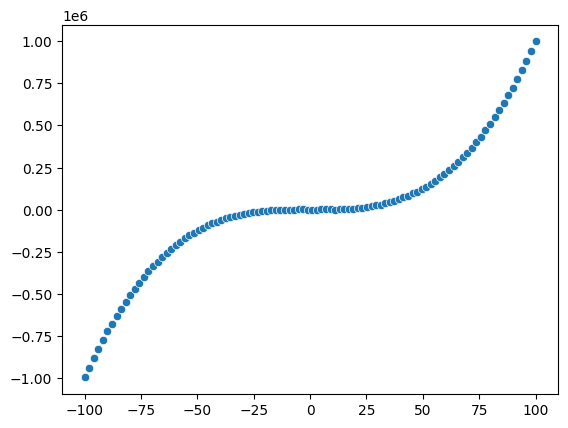

In [57]:
x=np.linspace(-100, 100, 100)
y=x**3
y+= np.random.normal(0,1000,x.size)
sns.scatterplot(
    x=x, y=y
)
np.corrcoef(x,y)

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


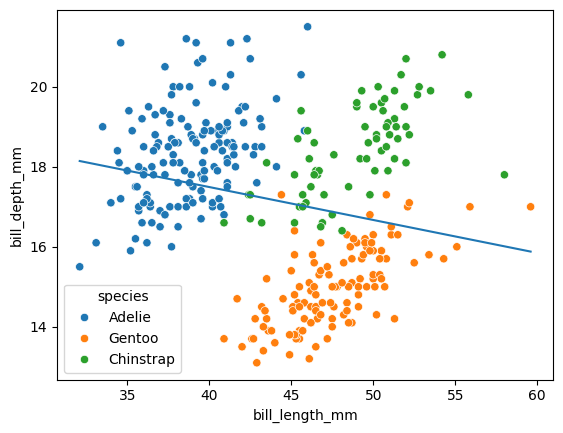

In [58]:
sns.scatterplot(
    data=prepro_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)
res_penguis = scipy.stats.linregress(
    x= prepro_penguin_df.bill_length_mm,
    y= prepro_penguin_df.bill_depth_mm
)
print(res_penguis)
fx_1 = np.array([prepro_penguin_df.bill_length_mm.min(), prepro_penguin_df.bill_length_mm.max()])
fy_1 = res_penguis.intercept + res_penguis.slope*fx_1
plt.plot(fx_1, fy_1)

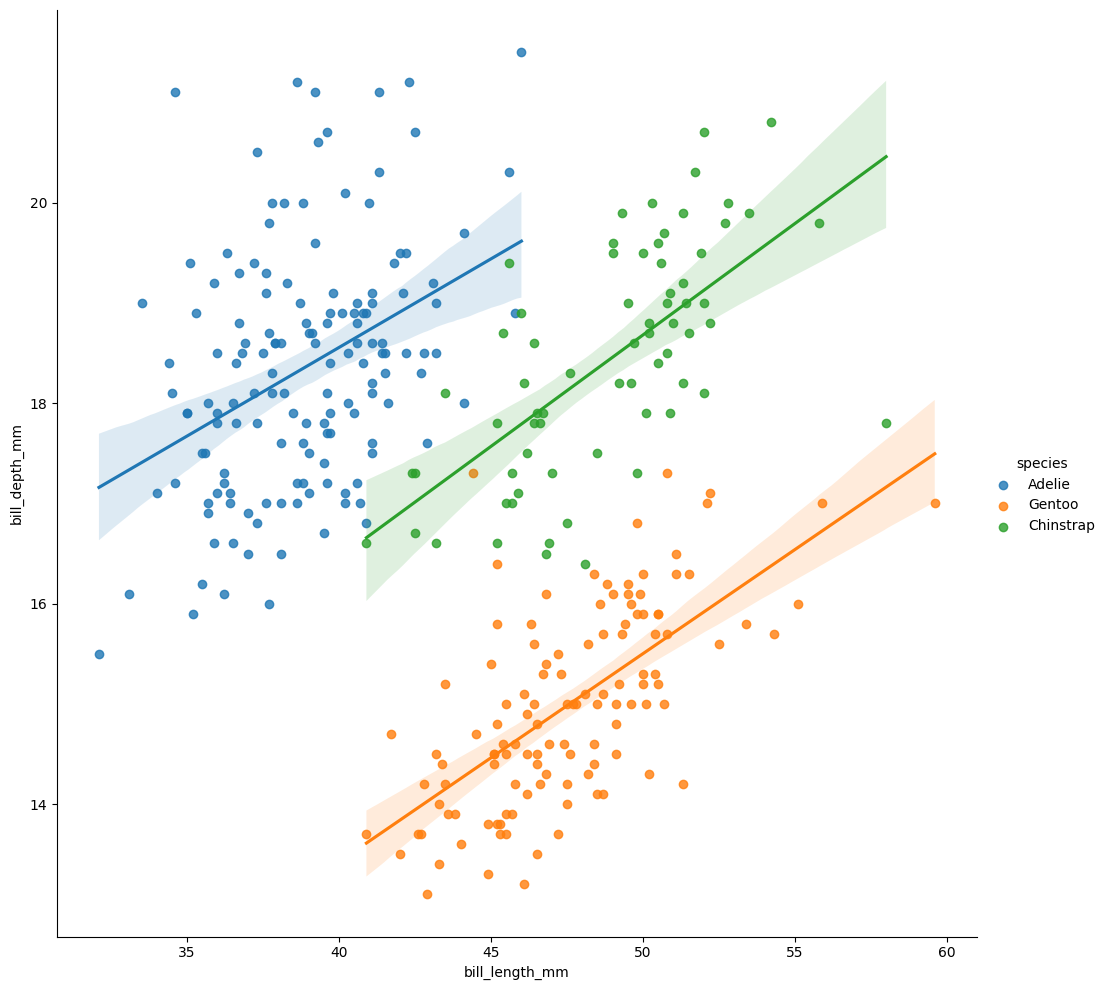

In [59]:
sns.lmplot(
    data=prepro_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

### Regresion Lineal Simple

In [60]:
x= prepro_penguin_df.bill_length_mm
y= prepro_penguin_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)


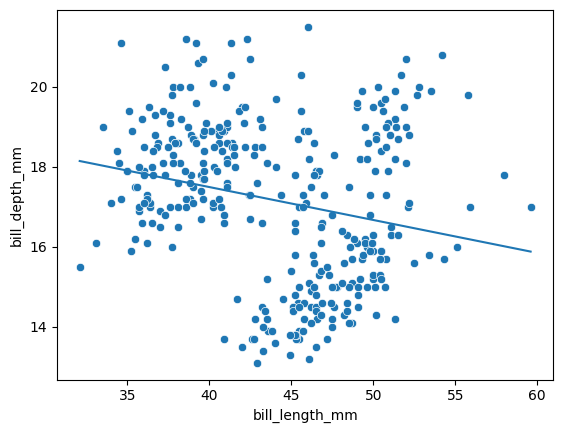

In [61]:
sns.scatterplot(
    x=x,
    y=y
)
fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope*fx_1
plt.plot(fx_1, fy_1)

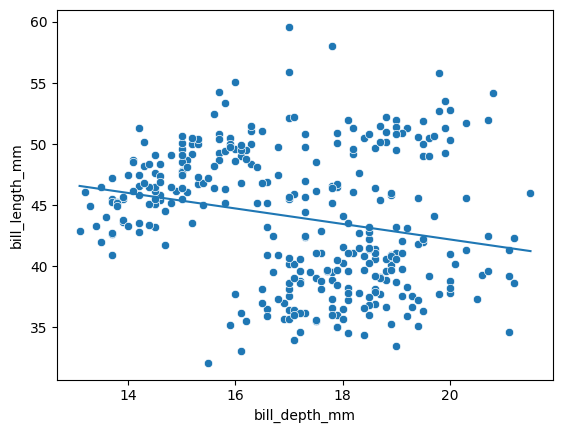

In [62]:
sns.scatterplot(
    x=y,
    y=x
)
fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope*fx_2
plt.plot(fx_2, fy_2)

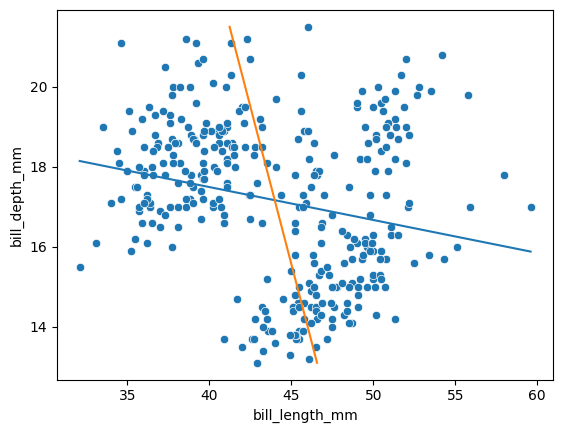

In [63]:
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

In [64]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data= prepro_penguin_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

### Regresion Multivariée

In [65]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=prepro_penguin_df
    )
    .fit()
)

model_1.summary()  #descripcion del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.54e-32
Time:                        13:02:48   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=prepro_penguin_df
    )
    .fit()
)

model_2.summary()  #descripcion del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           7.04e-46
Time:                        13:02:48   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=prepro_penguin_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          9.26e-103
Time:                        13:02:48   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=prepro_penguin_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          6.28e-122
Time:                        13:02:49   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~  flipper_length_mm',
        data=prepro_penguin_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          3.13e-105
Time:                        13:02:49   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analyse Regression 

In [70]:
models_results= pd.DataFrame(
    dict(
        actual_value=prepro_penguin_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species= prepro_penguin_df.species,
        sex= prepro_penguin_df.sex
    )
)
models_results


,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3205.648453,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3456.414782,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3907.794176,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3807.487644,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3657.027846,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4509.633367,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4258.867037,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,3807.487644,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4660.093165,Chinstrap,male


### ECDFs

<Axes: ylabel='Proportion'>

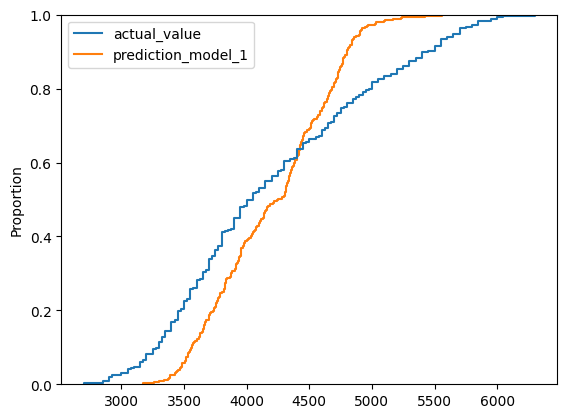

In [71]:
sns.ecdfplot(
    data= models_results[['actual_value','prediction_model_1']]
)

<Axes: ylabel='Density'>

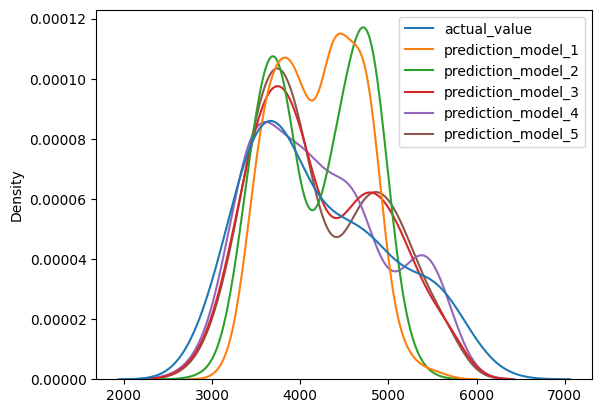

In [72]:
# Densite de prediction
sns.kdeplot(
    data=models_results
)

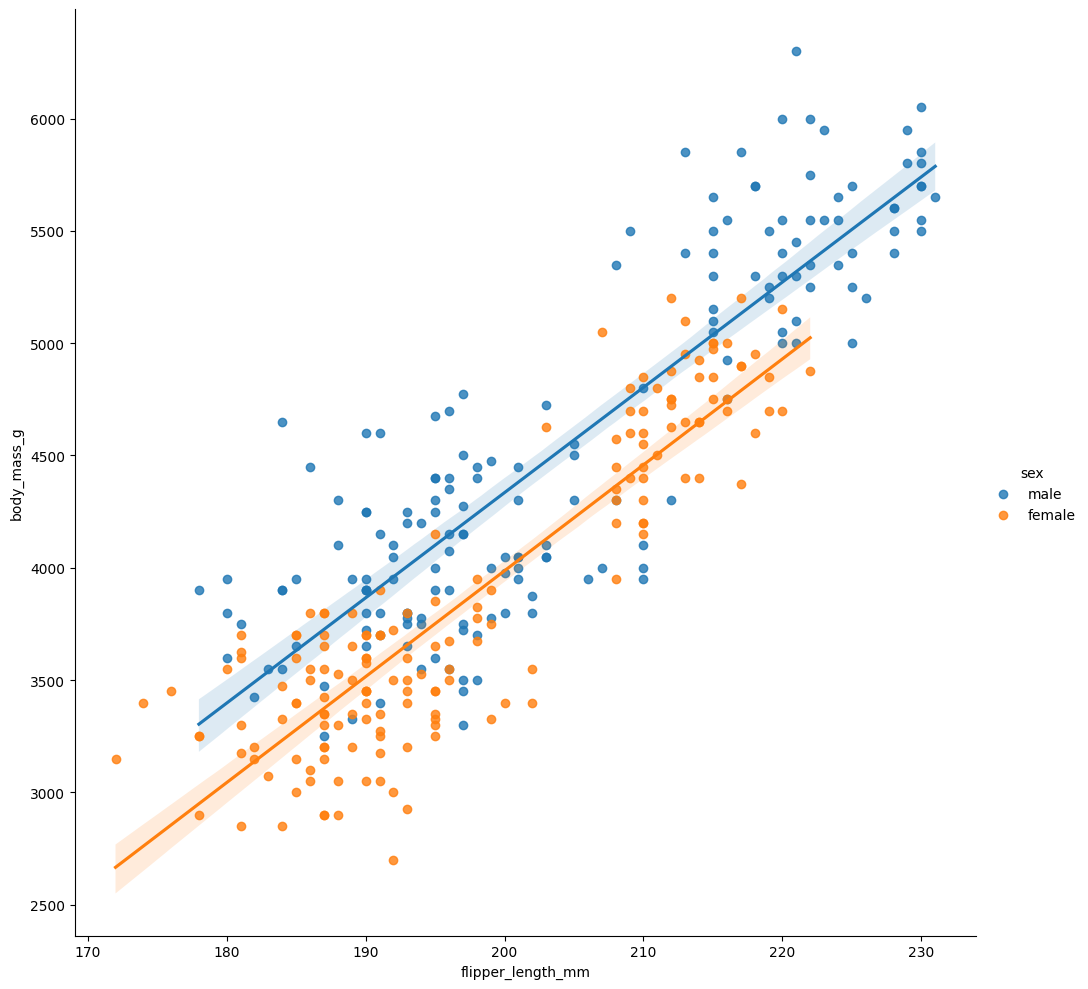

In [73]:
sns.lmplot(
    data= prepro_penguin_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

### Analyse Logistique

In [74]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=numeric_columns
    
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.4793
Time:                        13:02:51   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [75]:
prepro_penguin_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [76]:
(
    prepro_penguin_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


In [77]:
prepro_penguin_df=(
    prepro_penguin_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
)

C:\Users\Jose Fabian Cardona\AppData\Local\Temp\ipykernel_5696\3287136848.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))


In [78]:
model_is_adelie=smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=prepro_penguin_df
).fit()
model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [79]:
is_adelie_df_predictions=pd.DataFrame(
    dict(
        actual_adelie = prepro_penguin_df.is_adelie,
        predicted_values= model_is_adelie.predict().round()
    )
)
is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [80]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie','predicted_values'])
    .reset_index(name='count')
)

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


In [81]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

### Paradoja de Simpson

Une tendance qui apparaît dans plusieurs ensembles de données disparaît lorsque ces ensembles de données sont combinés et c'est la tendance opposée qui apparaît pour les données agrégées.


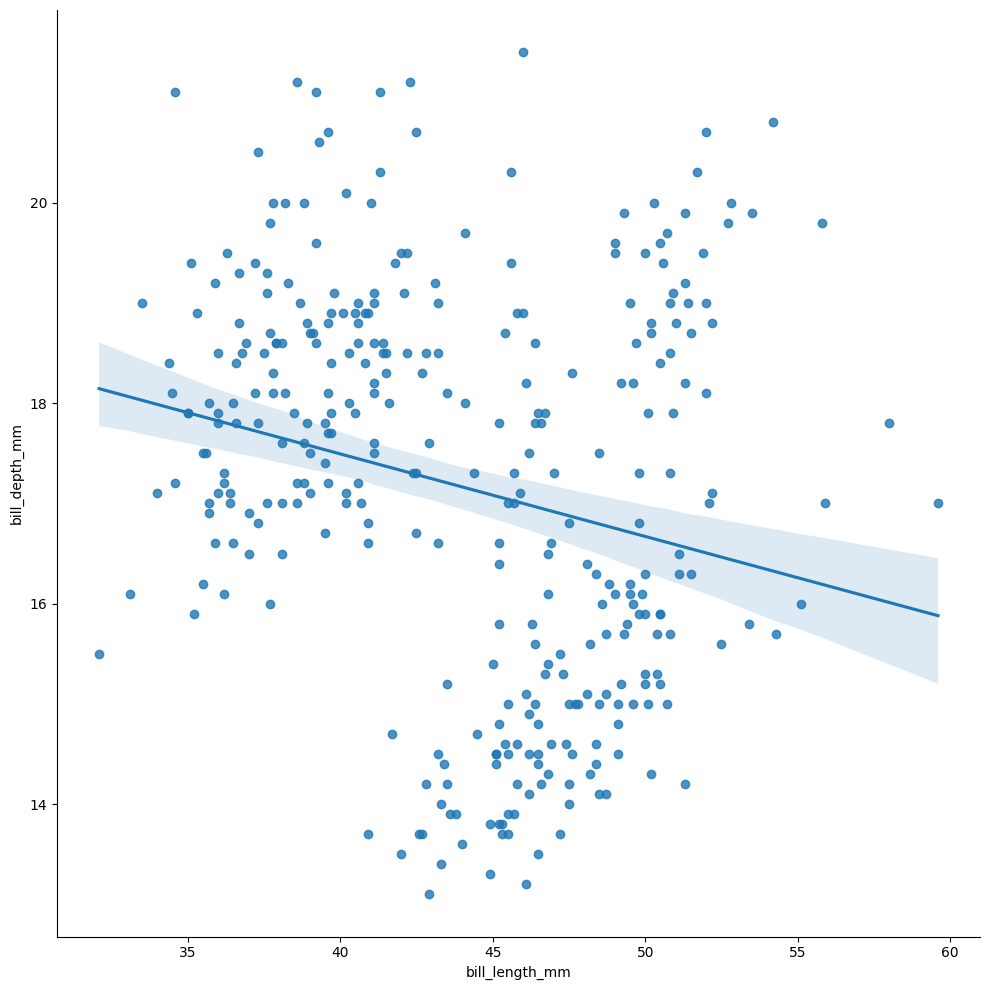

In [82]:
sns.lmplot(
    data= prepro_penguin_df,
    x= 'bill_length_mm',
    y='bill_depth_mm',
    height=10
)

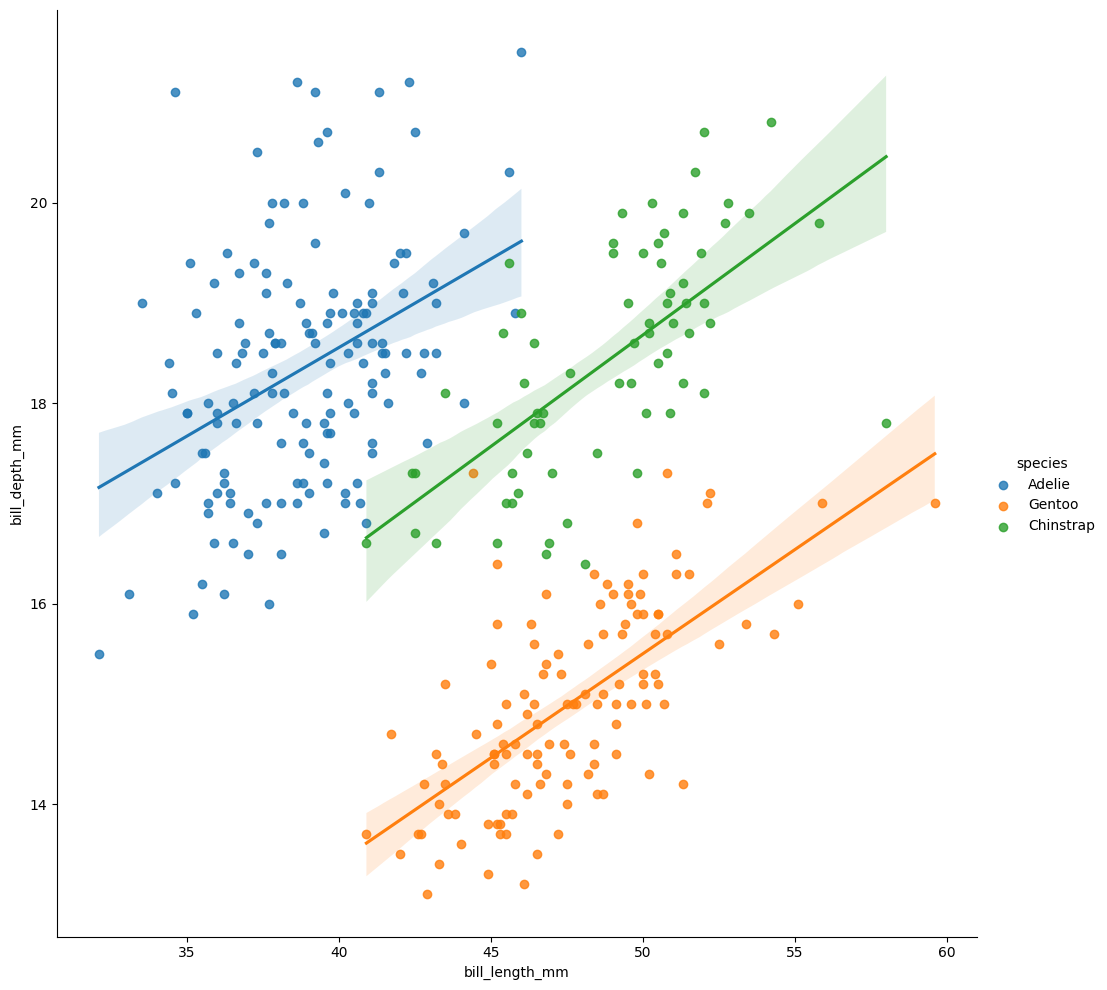

In [83]:
sns.lmplot(
    data= prepro_penguin_df,
    x= 'bill_length_mm',
    y='bill_depth_mm',
    hue= 'species',
    height=10
)

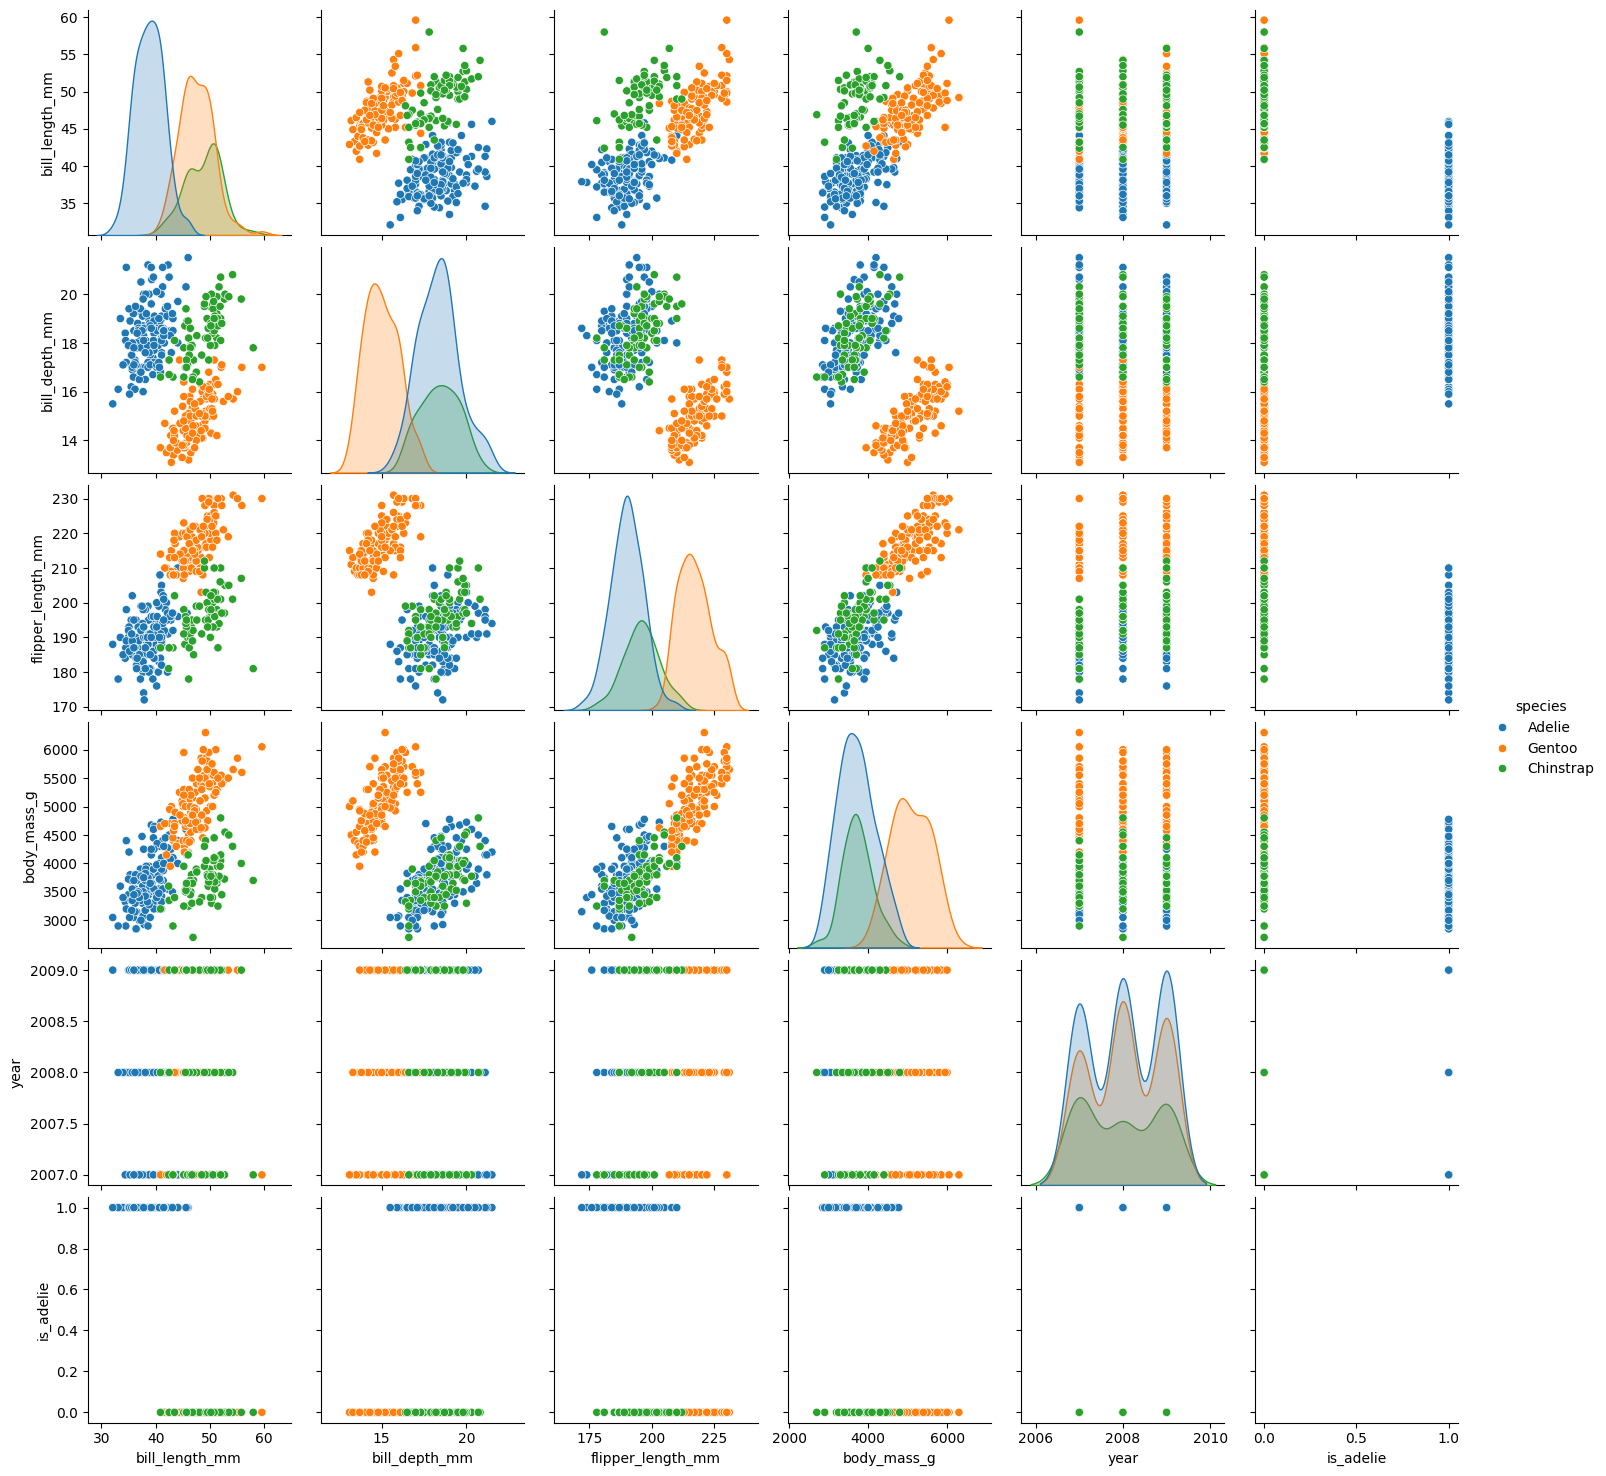

In [84]:
sns.pairplot(
    data= prepro_penguin_df,
    hue='species'
)

### Conclusion

Le nettoyage est la première étape du processus ainsi que la visualisation, ce qui nous permet d'avoir une idée de la façon de travailler avec les variables si elles ont des distributions normales ou si elles ont des comportements particuliers, ainsi que la régression, qui nous permet de voir les dépendances.